In [3]:
import os
os.chdir("/content/drive/MyDrive/MADE/Project/deap")

In [4]:
#username: evshuranov@itmo.ru
#password: ljli0Nyj

In [5]:
#!wget --user evshuranov@itmo.ru --password ljli0Nyj http://www.eecs.qmul.ac.uk/mmv/datasets/deap/data/metadata_csv.zip

In [6]:
#!wget --user evshuranov@itmo.ru --password ljli0Nyj  "http://www.eecs.qmul.ac.uk/mmv/datasets/deap/data/data_preprocessed_python.zip" 


In [7]:
#!wget --user evshuranov@itmo.ru --password ljli0Nyj  "http://www.eecs.qmul.ac.uk/mmv/datasets/deap/data/data_original.zip" 

In [8]:
#!unzip  data_original.zip -d .

In [9]:
import pickle
x = pickle.load(open('./data_preprocessed_python/s01.dat', 'rb'), encoding='latin1')

In [10]:
data = x['data']
labels = x['labels']

In [11]:
print(data.shape)

(40, 40, 8064)


In [12]:
print(labels.shape)

(40, 4)


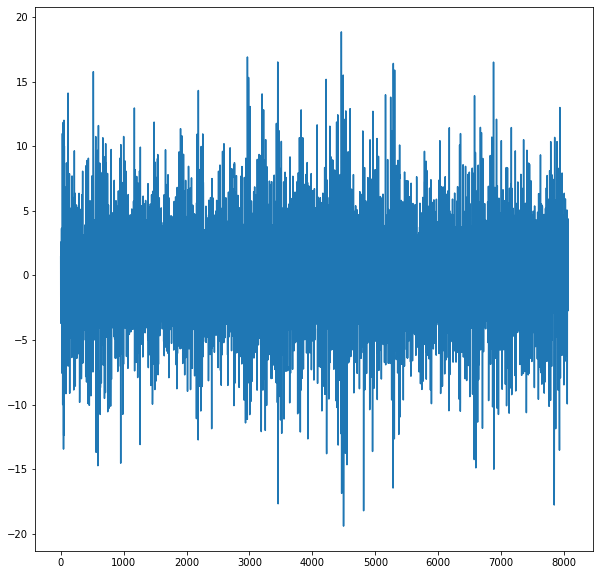

In [13]:
import matplotlib.pyplot as plt
#for i in range(1):
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.plot(data[24][0][:])


The logarithms of the spectral power from
theta (4-8 Hz), slow alpha (8-10 Hz), alpha (8-12 Hz), beta
(12-30Hz) and gamma (30+ Hz) bands were extracted
from all 32 electrodes as features. In addition to power
spectral features the difference between the spectral
power of all the symmetrical pairs of electrodes on
the right and left hemisphere was extracted to measure
the possible asymmetry in the brain activities due to
emotional stimuli. The total number of EEG features of
a trial for 32 electrodes is 216.

In [15]:
import scipy
from  scipy import signal
freq, power = signal.welch(data[0][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
freq_ranges = [range(4,9), range(8,11), range(8,13), range(12, 31), range(30,48)]
pairs_canals = [[1, 17], [2, 18], [3, 20], [4, 21], [5, 22], [6, 23], [7, 25], [8, 26], [9, 27], [10, 28], [11, 29], [12, 30], [13, 31], [14, 32]]
#FC5-CP5, FC1-CP1, FC2-CP2, FC6-CP6, F7-P7, F3-P3, Fz-Pz,F4-P4, F8-P8, Fp1-O1, Fp2-O2
pairs_canals_1 = [[6, 21], [5, 9], [26, 30], [21, 25], [3, 11], [4, 12], [31, 32], [27, 19], [28, 20], [1, 15], [30, 17] ]
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
max_freq = 128
NVIDEOS = 40
NCANALS = 32

In [13]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
def get_features_whole(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            data_for_one_video.extend([np.log(mean_power)])
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        #for s in range(5):
         #  for k in range(s):
          #   data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = powers[canal_1] -  powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())  

        temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    temp[0:160] = stats.zscore(temp[0:160])
    temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
    
  return result#np.asarray(data_for_videos)     



In [16]:
import glob
data = []
labels = []
data_dir = './data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.dat"))

for file_data in files:
    raw_data = pickle.load(open(file_data, 'rb'), encoding='latin1')
    data.append(raw_data['data'])
    labels.append(raw_data['labels'])

In [ ]:
type_emotion = 0
kol_sum1 = 0
kol_sum0 = 0
for i in range(32):
    kol = labels_bin[i][:, type_emotion].sum()
    print(kol, 40 - kol)
    kol_sum1 += kol
    kol_sum0 += 40 - kol
print(kol_sum0/(kol_sum1 + kol_sum0))    

20 20
28 12
33 7
30 10
26 14
23 17
24 16
27 13
23 17
20 20
20 20
22 18
17 23
26 14
30 10
26 14
28 12
25 15
22 18
32 8
19 21
24 16
27 13
33 7
25 15
23 17
28 12
29 11
22 18
30 10
17 23
29 11
0.36875


In [ ]:
type_emotion = 1
for i in range(32):
    kol = labels_bin[i][:, type_emotion].sum()
    print(kol, 40 - kol)

In [ ]:
type_emotion = 2
for i in range(32):
    kol = labels_bin[i][:, type_emotion].sum()
    print(kol, 40 - kol)

In [ ]:
# type_emotion = 3
# for i in range(32):
#     kol = labels_bin[i][:, type_emotion].sum()
#     print(kol, 40 - kol)

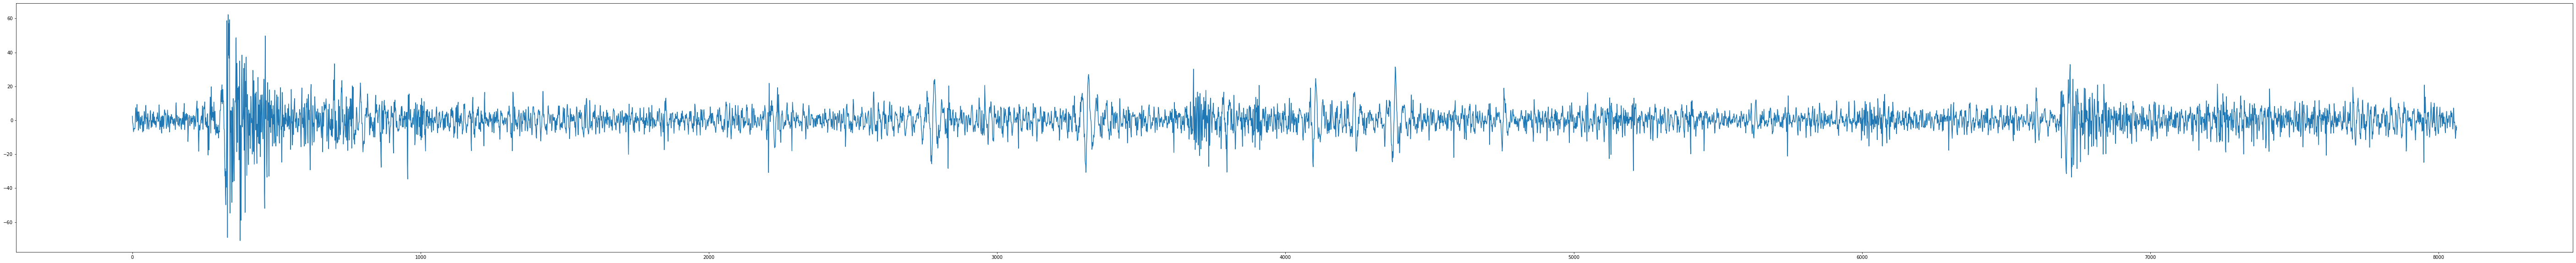

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (100, 10))
ax.plot(data[4][0, 0])

In [ ]:
data[1] = np.load("./data_preprocessed_python/s02_40.npy")

In [ ]:
# import pandas as pd
# def get_statistics_for_sub(data, labels):
#     indexes = []
#     for i in range(NVIDEOS):
#       for j in range(NCANALS):
#           indexes.append(f'{i}_{j}')

#     result = pd.DataFrame(columns = ['mean', 'std', 'min', 'max', 'arousal', 'valence', 'dominance', 'like'], index = indexes)
#     #print(result.head())
#     for trial in range(len(data)):
#        for canal in range(NCANALS):
#          result.loc[f"{trial}_{canal}", "mean"]  = data[trial, canal, :].mean()
#          result.loc[f"{trial}_{canal}", "std"]  = data[trial, canal, :].std()
#          result.loc[f"{trial}_{canal}", "min"]  = data[trial, canal, :].min()
#          result.loc[f"{trial}_{canal}", "max"]  = data[trial, canal, :].max()
#          result.loc[f"{trial}_{canal}", "arousal"]  = labels[trial, 0]
#          result.loc[f"{trial}_{canal}", "valence"]  = labels[trial, 1]
#          result.loc[f"{trial}_{canal}", "dominance"]  = labels[trial, 2]
#          result.loc[f"{trial}_{canal}", "like"]  = labels[trial, 3]

#     return result
 

In [ ]:
# for i in range(32):
#     result = get_statistics_for_sub(data[i], labels[i])
#     #print(result.iloc[0:40])
#     print(i)
#     print(result[result['arousal'] >=5].mean(axis = 0), result[result['arousal'] >= 5].std(axis = 0))
#     print(result[result['arousal'] <5].mean(axis = 0), result[result['arousal'] < 5].std(axis = 0))


In [ ]:
#print(result[result['arousal'] >=5].mean(axis = 0), result[result['arousal'] > 5].std(axis = 0))

In [ ]:
#print(result[result['arousal'] < 5].mean(axis = 0), result[result['arousal'] < 5].std(axis = 0))

In [ ]:
# i_em
# fig, axes = plt.subplots(10, 3, figsize = (50, 50))
# for sub in range(0, 10):
#     for canal in range(0, 32, 10)
#     axes[sub, canal].plt(data[sub][])
#     #freq, power = signal.welch(data[i][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
#     axes[i -A].plot(freq, power)
#     axes[i - A].set_title(f'labels = {(labels[i][0] > 4.5)}')

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_whole(data[i], labels[i], freq_resolution, max_freq))


In [ ]:
data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
labels_bin = []
for i in range(32):
  temp = labels[i] > 4.5
  #print(labels[i])
  #print(temp)
  labels_bin.append(temp)
  #break
labels_all_bin = np.vstack(labels_bin)  

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data_all)

In [ ]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

colors = labels_all_bin[:, 0]#[i // 40 for i in range(1280)]
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.scatter(x_axis, y_axis, c = colors)

In [ ]:
fig, axes = plt.subplots(6, 6, figsize = (50, 50))
for sub in range(32):
    model = TSNE(learning_rate = 1000)
    transformed = model.fit_transform(data_all[sub * 40 : sub * 40 + 40])

    x_axis = transformed[:, 0]
    y_axis = transformed[:, 1]


    colors = labels_all_bin[sub * 40 : sub * 40 + 40, 0]
    #print(colors)
    axes[sub // 6, sub % 6 ].scatter(x_axis, y_axis, c = colors)

In [ ]:
print(labels_all[0])

[7.71 7.6  6.9  7.83]


In [ ]:
threshold = 4.5

In [ ]:
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_whole(data[i], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
threshold = 0.5
k = 5
labels_common = []
emotions = ["valence", "arousal", "dominance", "like"]


#for n in range(10, 100, 10):
for i_em in range(4):
    f1_all = []
    acc_all = []
    print(emotions[i_em])
    
    labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
    #print(sum(labels_common[i_em]))
    X = np.arange(40)
    y = np.array(labels_common[i_em])
#print(y)
    #if i_em != 0:
    #  continue

    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    n = 50
    if i_em == 1:  
      n = 10

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        #model = lgbm.sklearn.LGBMClassifier()
        #model =  RandomForestClassifier(150)
        #model = lgbm.sklearn.LGBMClassifier()
        model =  GaussianNB()
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train, y_test)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        for j in range(32):
            data_train.append(data_for_videos[j][train_index])
            data_test.append(data_for_videos[j][test_index])
            labels_train.extend(labels_bin[j][:, i_em][train_index])
            labels_test.extend(labels_bin[j][:, i_em][test_index])
            labels_subject.append(labels_bin[j][:, i_em][test_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        data_all = np.vstack((data_train_all, data_test_all))
        labels_all = np.hstack((labels_train, labels_test))
        model.fit(data_train_all, labels_train)



        #X = data_all
        #y = labels_all
        #parameters = {'n_estimators':[50, 100, 300, 400], 'min_samples_split' : [2, 4, 6, 8, 10, 12], 'max_features' : ['log2', 'sqrt'], 'class_weight' : ["balanced", "balanced_subsample", "None"]}
        #model =  RandomForestClassifier()
        #clf = GridSearchCV(model, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        # clf.fit(X, y)
        # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        # parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # svc = svm.SVC()
        #clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        #clf.fit(X, y)
        #print(clf.best_score_, clf.best_params_)




        labels_predicted = model.predict(data_test_all)
        f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
        acc_all.append(accuracy_score(labels_predicted, labels_test)) 
        f1_sub = []
        acc_sub = []
        for i in range(32):
              labels_predicted_sub = model.predict(data_test[i])
              f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
              acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
              #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
        #break     
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

    print("*************************")
    print(f1_all)
    print(acc_all)
    print(np.mean(f1_all))    
    print(np.mean(acc_all))  
    print  
                      
                      


valence


NameError: ignored

In [ ]:
print(f1_data)
print(acc_data)
print(f1_all)
print(acc_all)

In [ ]:
# import glob
# import pickle
# from sklearn.preprocessing import MinMaxScaler

data1 = []
data_dir = './data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.npy"))
data_raw = []
for file_data in files:
    raw_data = np.load(open(file_data, 'rb'))
    data1.append(raw_data)
    

In [ ]:
data[1] = data1[0]
data[2] = data1[1]
data[3] = data1[2]

In [ ]:
# 0.7417460317460318 {'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
# 0.6976179376179376 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6002131202131202 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5205594405594406 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6535064935064935 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6111976911976912 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6208946608946608 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'poly'}
# 0.6060606060606062 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6003463203463204 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'poly'}
# 0.773015873015873 {'C': 0.015625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6476190476190476 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.6496248196248195 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5896969696969696 {'C': 0.00390625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'poly'}
# 0.6752669552669552 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.8923076923076924 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.7526551226551227 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5476190476190477 {'C': 0.00390625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5333621933621934 {'C': 0.125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5464213564213564 {'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}
# 0.5184415584415585 {'C': 0.001953125, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'linear'}

In [ ]:
def f1(k):
  return(2 * (k) * (0.5)/(k + 0.5))

k = 0.369
print((f1(k) + f1(1-k))/2)

0.4912696789606436


In [ ]:
def f1(k):
  return(2 * (k) * (0.5)/(k + 0.5))

k = 0.1
print((f1(k) + f1(1-k))/2)

0.40476190476190477


In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm
threshold = 0.5
k = 5
labels_common = []

f1_iter = np.zeros((10, 4))
acc_iter = np.zeros((10, 4))
for iter in range(10):
        for i_em in range(2):
            
            labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
            #print(sum(labels_common[i_em]))
            X = np.arange(40)
            y = np.array(labels_common[i_em])
        #print(y)
            #if i_em != 0:
            #  continue

            skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
            f1_data = pd.DataFrame(columns = range(k), index = range(32))
            acc_data = pd.DataFrame(columns = range(k), index = range(32))
            n = 50
            if i_em == 1:  
              n = 10

            for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #model = lgbm.sklearn.LGBMClassifier()
                #model =  RandomForestClassifier(50)
                #print("TRAIN:", train_index, "TEST:", test_index)
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                #print(y_train, y_test)
                data_train = []
                data_test = []
                labels_train = []
                labels_test = []
                labels_subject = []
                labels_subject_train = []
                for j in range(32):
                    data_train.append(data_for_videos[j][train_index])
                    data_test.append(data_for_videos[j][test_index])
                    labels_train.extend(labels_bin[j][:, i_em][train_index])
                    labels_test.extend(labels_bin[j][:, i_em][test_index])
                    labels_subject.append(labels_bin[j][:, i_em][test_index])
                    labels_subject_train.append(labels_bin[j][:, i_em][train_index])

                    
                    #print(labels_test[j])
                data_train_all = np.vstack(data_train)
                data_test_all = np.vstack(data_test)   
                #model.fit(data_train_all, labels_train)
                #labels_predicted = model.predict(data_test_all)
                f1_sub = []
                acc_sub = []
                #print(y_train, y_test )
                for i in range(0,32):
                      #model =  RandomForestClassifier(100, class_weight = 'balanced')
                      #X = data_for_videos[i]
                      #y = labels_bin[i][:, i_em]
                      # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
                      # parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
                      # svc = svm.SVC()
                      # clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
                      # clf.fit(X, y)
                      # print(clf.best_score_, clf.best_params_)
                      #parameters = {'n_estimators':[50, 100, 300, 400], 'min_samples_split' : [2, 4, 6, 8, 10, 12], 'max_features' : ['log2', 'sqrt'], 'class_weight' : ["balanced", "balanced_subsample", "None"]}
                      #model =  RandomForestClassifier()
                      #clf = GridSearchCV(model, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
                      #clf.fit(X, y)
                      #print(clf.best_score_, clf.best_params_)
                      #model = svm.SVC(C=0.0009765625, class_weight='balanced', gamma = 0.0009765625, kernel = 'linear')
                      #model = svm.SVC(C =  1.0, class_weight ='balanced', gamma = 0.03125, kernel = 'rbf')
                
                      #(C=0.0009765625, class_weight='balanced', kernel = 'linear')
                      if (labels_subject_train[i].sum() == len(labels_subject_train[i])):
                         print(i, i_em)
                         continue
                      model.fit(data_train[i],  labels_subject_train[i])#
                      labels_predicted_sub = model.predict(data_test[i])
                      #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
                      f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
                      acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
                      #print(f1_data.loc[i, fold] )
                      #print(acc_data.loc[i, fold] )
                f1_iter[iter, i_em] = (np.mean(f1_data.values.mean(axis = 1)))      
                acc_iter[iter, i_em] = (np.mean(acc_data.values.mean(axis = 1)))


print((f1_iter.mean(axis = 0)))    
print((acc_iter.mean(axis = 0)))    
    #print(np.mean(f1_data.values.mean(axis = 1)))
    #print(np.mean(acc_data.values.mean(axis = 1)))

[0.40672524 0.42558524 0.         0.        ]
[0.62078125 0.63890625 0.         0.        ]


In [74]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_whole1(data[i], labels[i], freq_resolution, max_freq))

In [73]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
def get_features_whole1(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            data_for_one_video.extend([np.log(mean_power)])
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        #for s in range(5):
         #  for k in range(s):
          #   data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = powers[canal_1] -  powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())  

        temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    temp[0:160] = stats.zscore(temp[0:160])
    temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
    
  return result#np.asarray(data_for_videos)     



In [75]:
labels_3 = []
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] > 6.5
  temp = np.zeros_like(labels[i])
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  #break
labels_all_3 = np.vstack(labels_3)  

In [ ]:
print(labels_3[0])

In [107]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

threshold = 0.5
k = 5
labels_common = []
emotions = ["valence", "arousal", "dominance", "like"]


#for n in range(10, 100, 10):
for i_em in range(1):
    f1_all = []
    acc_all = []
    print(emotions[i_em])
    
    labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
    #print(sum(labels_common[i_em]))
    X = np.arange(40)
    y = np.array(labels_common[i_em])
#print(y)
    #if i_em != 0:
    #  continue

    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    n = 50
    if i_em == 1:  
      n = 10

      # train_indexes = []
      # test_indexes = []
      # for j in range(32):
      #               # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
      #           train_indexes.append([])    
      #           test_indexes.append([])    
      #           #X = np.arange(40)
      #           y = np.array(labels_3[j][:, i_em])
      #           y = y[y!=0]
      #           #print(len(y))
      #           X = np.arange(len(y))
                
                
      #           skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
      #           #kf = KFold(n_splits=k, random_state=None, shuffle=True)
      #           for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
      #           #for fold, (train_index, test_index) in enumerate(kf.split(X)):
      #               train_indexes[-1].append(train_index)
      #               test_indexes[-1].append(test_index)


    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(fold)
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250)
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250, class_weight = 'balanced')#!!!!!!!
        model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
        #model =  RandomForestClassifier(100)
        #model = svm.SVC(kernel = 'poly', gamma = 'auto')
        #print("TRAIN:", train_index, "TEST:", test_index)
        #model = KNeighborsClassifier(n_neighbors=2)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train, y_test)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        for j in range(32):
            data_train.append(data_for_videos[j][train_index])
            data_test.append(data_for_videos[j][test_index])
            labels_train.extend(labels_3[j][:, i_em][train_index])
            labels_test.extend(labels_3[j][:, i_em][test_index])
            labels_subject.append(labels_3[j][:, i_em][test_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        data_all = np.vstack((data_train_all, data_test_all))
        labels_all = np.hstack((labels_train, labels_test))
        data_train_strong = data_train_all[np.array(labels_train) != 0]
        labels_train_strong = np.array(labels_train)[np.array(labels_train) != 0 ]
        data_test_strong = data_test_all[np.array(labels_test) != 0]
        labels_test_strong = np.array(labels_test)[np.array(labels_test) != 0 ]
        model.fit(data_train_strong, labels_train_strong)
        #model.fit(data_train_all, labels_train)



        #X = data_all
        #y = labels_all
        #parameters = {'n_estimators':[50, 100, 300, 400], 'min_samples_split' : [2, 4, 6, 8, 10, 12], 'max_features' : ['log2', 'sqrt'], 'class_weight' : ["balanced", "balanced_subsample", "None"]}
        #model =  RandomForestClassifier()
        #clf = GridSearchCV(model, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        # clf.fit(X, y)
        # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        # parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # svc = svm.SVC()
        #clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        #clf.fit(X, y)
        #print(clf.best_score_, clf.best_params_)




        labels_predicted = model.predict(data_test_strong)
        #labels_predicted = model.predict(data_test_all)

        #f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
        #acc_all.append(accuracy_score(labels_predicted, labels_test)) 
        f1_all.append(f1_score(labels_predicted, labels_test_strong, average = 'macro'))
        acc_all.append(accuracy_score(labels_predicted, labels_test_strong)) 
        f1_sub = []
        acc_sub = []
        for i in range(32):
               data_strong = data_test[i][np.array(labels_subject[i]) != 0]
               labels_strong = np.array(labels_subject[i])[np.array(labels_subject[i]) != 0 ]
               print(labels_strong)
               if (len(labels_strong) == 0):
                   print("!!!!!!!")
                   f1_data.loc[i, fold] = 0.5#(f1_score(labels_predicted_sub, labels_strong, average = 'macro'))
                   acc_data.loc[i, fold] =  0.5#(accuracy_score(labels_predicted_sub, labels_strong))  
                   continue


               labels_predicted_sub = model.predict(data_strong)
               f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_strong, average = 'macro'))
               acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_strong))  
        #       #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
        # #break     
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

    print("*************************")
    print(f1_all)
    print(acc_all)
    print(np.mean(f1_all))    
    print(np.mean(acc_all))  
    print  
                      
                      


valence
0
[2. 2. 2. 1. 2. 2. 1. 1.]
[1. 2. 2. 2. 1.]
[2. 2. 2. 2.]
[2. 2. 2. 2. 1. 1. 2.]
[2. 2. 1.]
[2. 1.]
[2. 2. 2. 1. 1.]
[2. 2. 1. 1.]
[2. 2. 2. 1. 1. 1.]
[1. 1. 1.]
[2. 2. 2. 1. 1.]
[2. 2. 2. 1. 1. 1.]
[2. 1. 1.]
[2. 2. 2.]
[2. 2.]
[2. 2. 2. 1. 1. 1.]
[2. 2. 1. 1.]
[2. 2. 2. 2. 1.]
[2. 1. 1. 1.]
[2. 2. 2.]
[2. 1. 1. 1. 1.]
[2. 1. 1.]
[2. 2. 2. 1. 1.]
[2. 2. 1.]
[2. 2. 2. 2. 2. 1.]
[2. 2. 1. 1. 1. 1.]
[]
!!!!!!!
[1.]
[2. 1.]
[2. 2. 2. 2. 1.]
[1. 2. 1. 2. 1. 1.]
[2. 2. 1.]
1
[2. 2. 2. 2. 1.]
[2. 2. 2. 2. 2. 1. 1.]
[2. 2. 2. 1. 2.]
[2. 2. 2. 2. 2. 1.]
[2. 2. 2. 2. 2.]
[2. 1. 1.]
[2. 2. 2. 2. 1. 1.]
[2. 2. 2. 1.]
[2. 2. 2. 2. 2. 1. 1. 1.]
[2. 2. 2. 2. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1.]
[1. 2. 1.]
[2. 2. 1.]
[2. 2. 2.]
[2. 2. 2. 2. 1. 1.]
[2. 2. 2. 1. 1.]
[2. 2. 2. 1. 2. 1.]
[2. 2. 2. 2. 1. 1. 1.]
[2. 2. 2. 2.]
[2. 2. 2. 2. 1.]
[2. 2. 2. 1. 2. 1. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1.]
[2. 2. 2. 2. 2. 1.]
[2. 2. 2. 2. 1. 2. 1.]
[2. 2. 2. 2. 1. 1.]
[2. 2. 2. 1.]
[2. 2.

In [85]:
print(f1_data)

           0         1         2         3         4
0       0.75      0.25  0.666667  0.416667  0.857143
1      0.375  0.333333  0.583333  0.454545     0.375
2   0.461538         1  0.428571         1  0.428571
3   0.333333  0.333333      0.65  0.454545  0.333333
4          1       0.4         1  0.428571       0.4
5   0.333333         1         1         1      0.25
6   0.583333         1  0.428571         1       0.8
7   0.166667      0.25       0.5  0.733333       0.5
8   0.485714      0.75  0.733333  0.828571  0.485714
9   0.333333  0.733333  0.761905       0.4  0.857143
10  0.666667  0.619048       0.8  0.666667  0.733333
11         1  0.428571       0.5  0.428571  0.285714
12       0.4  0.733333  0.333333     0.375  0.761905
13       0.5  0.333333  0.733333       0.4       0.4
14         1         1         1         1  0.333333
15  0.761905  0.333333       0.4  0.333333  0.485714
16         1  0.333333  0.428571  0.428571  0.583333
17  0.333333       0.4  0.777778       0.4  0.

In [ ]:
print(data_train_strong.shape)
print(data_train_all.shape)
print(np.array(labels_train)[np.array(labels_train) != 0 ])

(1, 1024, 272)
(1024, 272)
[2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1.
 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1.

In [61]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

threshold = 0.5
k = 5
labels_common = []
emotions = ["valence", "arousal", "dominance", "like"]


#for n in range(10, 100, 10):
for i_em in range(1):
    f1_all = []
    acc_all = []
    print(emotions[i_em])
    
    labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
    #print(sum(labels_common[i_em]))
    X = np.arange(40)
    y = np.array(labels_common[i_em])
#print(y)
    #if i_em != 0:
    #  continue

    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    n = 50
    if i_em == 1:  
      n = 10

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250)
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250, class_weight = 'balanced')#!!!!!!!
        model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
        #model =  RandomForestClassifier(100)
        #model = svm.SVC(kernel = 'poly', gamma = 'auto')
        #print("TRAIN:", train_index, "TEST:", test_index)
        #model = KNeighborsClassifier(n_neighbors=2)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train, y_test)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        for j in range(32):
            data_train.append(data_for_videos[j][train_index])
            data_test.append(data_for_videos[j][test_index])
            labels_train.extend(labels_3[j][:, i_em][train_index])
            labels_test.extend(labels_3[j][:, i_em][test_index])
            labels_subject.append(labels_3[j][:, i_em][test_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        data_train_strong = data_train_all[np.array(labels_train) != 0]
        labels_train_strong = np.array(labels_train)[np.array(labels_train) != 0 ]
        data_test_strong = data_test_all[np.array(labels_test) != 0]
        labels_test_strong = np.array(labels_test)[np.array(labels_test) != 0 ]
        #model.fit(data_train_strong, labels_train_strong)
        #model.fit(data_train_all, labels_train)

        data_all = np.vstack((data_train_strong, data_test_strong))
        labels_all = np.hstack((labels_train_strong, labels_test_strong))
        



        X = data_all
        y = labels_all
        pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        #parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        parameters = {'kernel':(['rbf']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        clf.fit(X, y)
        print(clf.best_score_, clf.best_params_)
        break
        #print(clf.best_params_)




        #X = data_all
        #y = labels_all
        #parameters = {'n_estimators':[50, 100, 300, 400], 'min_samples_split' : [2, 4, 6, 8, 10, 12], 'max_features' : ['log2', 'sqrt'], 'class_weight' : ["balanced", "balanced_subsample", "None"]}
        #model =  RandomForestClassifier()
        #clf = GridSearchCV(model, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        # clf.fit(X, y)
        # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        # parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # svc = svm.SVC()
        #clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        #clf.fit(X, y)
        #print(clf.best_score_, clf.best_params_)




        #labels_predicted = model.predict(data_test_strong)
        

        
        ##f1_all.append(f1_score(labels_predicted, labels_test_strong, average = 'macro'))
        #acc_all.append(accuracy_score(labels_predicted, labels_test_strong)) 
        # f1_sub = []
        # acc_sub = []
        # for i in range(32):
        #       labels_predicted_sub = model.predict(data_test[i])
        #       f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
        #       acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
        #       #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
        # #break     
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

    print("*************************")
    print(f1_all)
    print(acc_all)
    print(np.mean(f1_all))    
    print(np.mean(acc_all))  
    print  
                      
                      


valence
0.591384169200969 {'C': 256.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
nan
nan
*************************
[]
[]
nan
nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
def process_lca(X, labels, threshold):
  #mask = (labels == 1)
  #print(mask)
  
  X_pos = X[np.array(labels) == 1]# np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 1])
  X_neg = X[np.array(labels) == 0] #np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 0])
  #print(X_pos.shape)
  #print(X_neg.shape)
  ##[X[i, :] if labels[i] == 1 for i in range(NVIDEOS)]
  M1 = np.mean(X_pos, axis = 0)
  M2 = np.mean(X_neg, axis = 0)
  SIG1 = np.std(X_pos, axis = 0)
  SIG2 = np.std(X_neg, axis = 0)
  D = abs(M1 - M2)**2/(SIG1 ** 2 + SIG2 ** 2)
  #print(X)
  mask =(D > threshold)
  result = X[:, mask]
  return result


In [ ]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = LDA()
>>> clf.fit(X, y)

In [ ]:
import scipy
from  scipy import signal
freq, power = signal.welch(data[0][0], fs=128.0, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
freq_resolution = max(freq)/(len(freq) - 1)
max_freq = 128
NVIDEOS = 40
NCANALS = 32

Добавляю отбор фич методом LDA ( с порогом 0.3)

In [ ]:
def get_features(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for i, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = (ar / freq_resolution).astype(int)
            power_range = power[ar]
            mean_power = (power_range).sum()#/len(power_range)
            data_for_one_video.extend([mean_power])
            powers_temp.append(mean_power)
        #for s in range(5):
        #  for k in range(s):
        #    data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.asarray(data_for_one_video[canal_1 * 5 : canal_1 * 5 + 5]) -  np.asarray(data_for_one_video[canal_2 * 5 : canal_2 * 5 + 5])
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    for s in range(5 * NCANALS):
      data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
  return np.asarray(data_for_videos)     

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features(data[i], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
print(data_all.shape)

(1280, 216)


In [ ]:
threshold = 0.3

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.LDA import LDA
def process_lca1(X, labels, threshold):
    clf = LDA()
    result = clf.fit_transform(X, labels)
    return result


In [ ]:
import pickle
from sklearn.model_selection import KFold 
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#define cross-validation method to use
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
cv_like = KFold(n_splits=5, random_state=1, shuffle=True)


acc_valence_all = []
f1_valence_all = []
acc_arousal_all = []
f1_arousal_all = []
acc_like_all = []
f1_like_all = []
for i in  range(len(data)):
    #print(i)
    #data_for_videos = get_features(data[i], labels[i], freq_resolution, max_freq)
    X = data_for_videos[i]
    y_valence = [1 if l > 4.5 else 0 for l in labels[i][:, 0]]
    y_arousal = [1 if l > 4.5 else 0 for l in labels[i][:, 1]]
    y_like = [1 if l > 4.5 else 0 for l in labels[i][:, 3]]
    #print(y_like)
    print(y_valence)
    print(y_arousal)
    print(y_like)
    X_valence = process_lca(X, y_valence, threshold)
    X_arousal = process_lca(X, y_arousal, threshold)
    X_like = process_lca(X, y_like, threshold)
    print(X_valence.shape)
    print(X_arousal.shape)
    print(X_like.shape)
    
    
    model = GaussianNB()
    #use k-fold CV to evaluate model
    scores_f1 = cross_val_score(model, X_valence, y_valence, cv=cv, scoring = 'f1_macro', n_jobs=-1)
    #print(scores_f1)

    f1_valence_all.append((np.mean(scores_f1), np.std(scores_f1)))
    model = GaussianNB()
    scores_acc = cross_val_score(model, X_valence, y_valence, cv=cv, scoring = 'accuracy', n_jobs=-1)
    #print(scores_acc)
    acc_valence_all.append((np.mean(scores_acc), np.std(scores_acc)))
    model = GaussianNB()
    # #use k-fold CV to evaluate model
    scores_f1 = cross_val_score(model, X_arousal, y_arousal, cv=cv, scoring = 'f1_macro', n_jobs=-1)
    #print(scores_f1)
    f1_arousal_all.append((np.mean(scores_f1), np.std(scores_f1)))
    scores_acc = cross_val_score(model, X_arousal, y_arousal, cv=cv, scoring = 'accuracy', n_jobs=-1)
    #print(scores_acc)
    acc_arousal_all.append((np.mean(scores_acc),np.std(scores_acc)))
    
    model = GaussianNB()
    # # #model = KNeighborsClassifier(n_neighbors=2) 
    # # #use k-fold CV to evaluate model
    scores_f1 = cross_val_score(model, X_like, y_like, cv=cv_like, scoring = 'f1_macro', n_jobs=-1)
    print(scores_f1)
    f1_like_all.append((np.mean(scores_f1), np.std(scores_acc)))
    scores_acc = cross_val_score(model, X_like, y_like, cv=cv_like, scoring = 'accuracy', n_jobs=-1)
    #print(scores_acc)
    acc_like_all.append((np.mean(scores_acc), np.std(scores_acc)))

In [ ]:
import pandas as pd
result = pd.concat((pd.DataFrame(f1_valence_all, columns = ['val_f1_mean', 'val_f1_std']),pd.DataFrame(acc_valence_all, columns = ['val_acc_mean', 'val_acc_std'])), axis = 1)
result = pd.concat((result, pd.DataFrame(f1_arousal_all, columns = ['arousal_f1_mean', 'arousal_f1_std']),pd.DataFrame(acc_arousal_all, columns = ['arousal_acc_mean', 'arousal_acc_std'])), axis = 1)
result = pd.concat((result, pd.DataFrame(f1_like_all, columns = ['like_f1_mean', 'like_f1_std']),pd.DataFrame(acc_like_all, columns = ['like_acc_mean', 'like_acc_std'])), axis = 1)
print(result)



    val_f1_mean  val_f1_std  ...  like_acc_mean  like_acc_std
0           NaN         NaN  ...          0.950      0.061237
1           NaN         NaN  ...            NaN           NaN
2           NaN         NaN  ...            NaN           NaN
3      0.605887    0.139295  ...          0.925      0.100000
4      0.527197    0.199751  ...          0.750      0.111803
5      0.768889    0.148609  ...          0.825      0.061237
6      0.749206    0.136208  ...            NaN           NaN
7           NaN         NaN  ...            NaN           NaN
8      0.637619    0.101691  ...          0.550      0.187083
9      0.707807    0.108064  ...          0.650      0.093541
10     0.823810    0.060265  ...          0.775      0.050000
11     0.713810    0.175303  ...          0.800      0.127475
12     0.671573    0.201955  ...          0.725      0.145774
13     0.640000    0.128496  ...          0.800      0.100000
14     0.716537    0.152318  ...          0.650      0.122474
15     0

In [ ]:
print(result.mean(axis = 0))

val_f1_mean         0.693812
val_f1_std          0.131971
val_acc_mean        0.726852
val_acc_std         0.120677
arousal_f1_mean     0.651250
arousal_f1_std      0.151481
arousal_acc_mean    0.748810
arousal_acc_std     0.122806
like_f1_mean        0.672367
like_f1_std         0.122806
like_acc_mean       0.748958
like_acc_std        0.124317
dtype: float64


(array([ 4.,  3.,  2., 10.,  6.,  3.,  1.,  1.,  1.,  1.]),
 array([0.575 , 0.5975, 0.62  , 0.6425, 0.665 , 0.6875, 0.71  , 0.7325,
        0.755 , 0.7775, 0.8   ]),
 <a list of 10 Patch objects>)

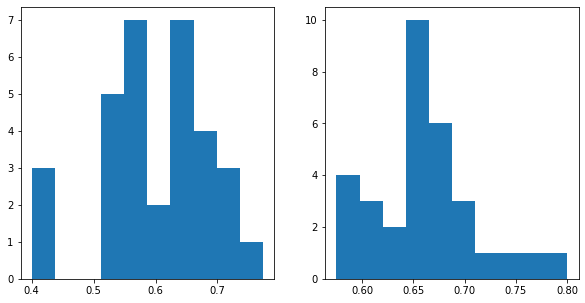

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(result['val_f1_mean'])
axes[1].hist(result['val_acc_mean'])



(array([ 1.,  1.,  3.,  3., 11.,  5.,  3.,  2.,  2.,  1.]),
 array([0.45  , 0.4925, 0.535 , 0.5775, 0.62  , 0.6625, 0.705 , 0.7475,
        0.79  , 0.8325, 0.875 ]),
 <a list of 10 Patch objects>)

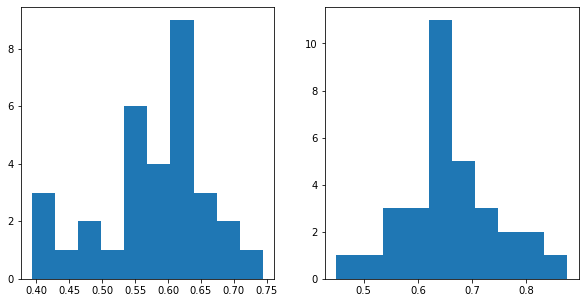

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(result['arousal_f1_mean'])
axes[1].hist(result['arousal_acc_mean'])

(array([1., 3., 4., 9., 1., 4., 3., 1., 1., 2.]),
 array([0.5  , 0.545, 0.59 , 0.635, 0.68 , 0.725, 0.77 , 0.815, 0.86 ,
        0.905, 0.95 ]),
 <a list of 10 Patch objects>)

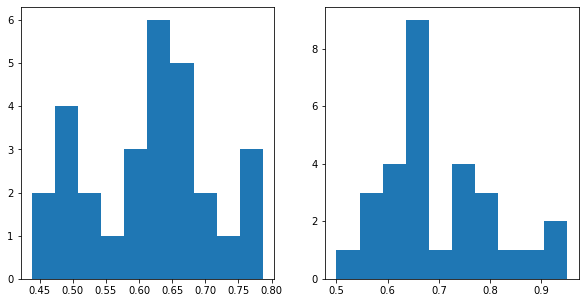

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(result['like_f1_mean'])
axes[1].hist(result['like_acc_mean'])

In [ ]:
pd.set_option('max_columns', None)
print(result)

    val_f1_mean  val_f1_std  val_acc_mean  val_acc_std  arousal_f1_mean  \
0      0.645238    0.168949         0.650     0.165831         0.657013   
1      0.514033    0.209136         0.650     0.165831         0.526984   
2      0.551096    0.236232         0.625     0.209165         0.606061   
3      0.671429    0.064153         0.675     0.061237         0.405758   
4      0.547399    0.158904         0.650     0.093541         0.538470   
5      0.407082    0.027035         0.650     0.145774         0.567302   
6      0.535584    0.140865         0.650     0.093541         0.617489   
7      0.576317    0.140173         0.650     0.093541         0.412063   
8      0.680952    0.232982         0.700     0.231840         0.652867   
9      0.558095    0.177124         0.575     0.169558         0.558788   
10     0.604473    0.144153         0.625     0.136931         0.619394   
11     0.583362    0.125181         0.600     0.122474         0.565714   
12     0.707807    0.1080

In [ ]:
from sklearn.manifold import TSNE
acc_valence_all = []
f1_valence_all = []
acc_arousal_all = []
f1_arousal_all = []
acc_like_all = []
f1_like_all = []

fig, axes = plt.subplots(6, 6, figsize = (50, 50))
for i in  range(32):
    #print(i)
    #data_for_videos = get_features(data[i], labels[i], freq_resolution, max_freq)
    X = data_for_videos[i]
    y_valence = [1 if l > 4.5 else 0 for l in labels[i][:, 0]]
    #y_arousal = [1 if l > 4.5 else 0 for l in labels[i][:, 1]]
    #y_like = [1 if l > 4.5 else 0 for l in labels[i][:, 3]]
    #print(y_like)
    #print(y_valence)
    #print(y_arousal)
    #print(y_like)
    X_valence = process_lca(X, y_valence, threshold)
    #X_arousal = process_lca(X, y_arousal, threshold)
    #X_like = process_lca(X, y_like, threshold)


    model = TSNE(learning_rate = 100)
    transformed = model.fit_transform(X_valence)

    x_axis = transformed[:, 0]
    y_axis = transformed[:, 1]


    colors = y_valence
    #print(colors)
    title = f"{result.loc[i, 'val_f1_mean']}"
    axes[i // 6, i % 6 ].scatter(x_axis, y_axis, c = colors)
    axes[i // 6, i % 6 ].set_title(title)





In [ ]:
for i in  range(1):
    X = data_for_videos[i]
    y_valence = [1 if l > 4.5 else 0 for l in labels[i][:, 0]]
    X_valence = process_lca(X, y_valence, 0.6)
    print(X_valence.shape)

    

(40, 7)


In [ ]:
print(type(X_valence))
print(y_valence)

<class 'numpy.ndarray'>
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
fig, axes = plt.subplots(5, 5, figsize = (50, 50))
for i in range(X_valence.shape[1]):
     mask = np.array(y_valence)
     axes[i // 5, i % 5 ].hist(X_valence[mask == 1, i])  
     axes[i // 5, i % 5 ].hist(X_valence[mask == 0, i])  


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.LDA import LDA
def process_lca1(X_train, labels_train, X_test, labels_test):
    clf = LDA()
    #print(X_train.shape)

    result_train = clf.fit_transform(X_train, labels_train)
    result_test = clf.transform(X_test)
    return result_train, result_test

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score
import lightgbm as lgbm
threshold = 0.5
k = 8
labels_common = []


#for n in range(10, 100, 10):
for i_em in range(4):
    
    labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
    #print(sum(labels_common[i_em]))
    X = np.arange(40)
    y = np.array(labels_common[i_em])
#print(y)
    #if i_em != 0:
    #  continue

    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    n = 50
    if i_em == 1:  
      n = 10

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        #model = lgbm.sklearn.LGBMClassifier()
        #model =  RandomForestClassifier(50)
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train, y_test)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        labels_subject_train = []
        for j in range(32):
            data_train.append(data_for_videos[j][train_index])
            data_test.append(data_for_videos[j][test_index])
            labels_train.extend(labels_bin[j][:, i_em][train_index])
            labels_test.extend(labels_bin[j][:, i_em][test_index])
            labels_subject.append(labels_bin[j][:, i_em][test_index])
            labels_subject_train.append(labels_bin[j][:, i_em][train_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        #model.fit(data_train_all, labels_train)
        #labels_predicted = model.predict(data_test_all)
        f1_sub = []
        acc_sub = []
        for i in range(32):
              X_train, X_test = process_lca1(data_train[i], labels_subject_train[i], data_test[i], labels_subject[i])
              model =  GaussianNB()
              model.fit(X_train,  labels_subject_train[i])#
              labels_predicted_sub = model.predict(X_test)
              f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
              acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

In [ ]:
def process_lca2(X, labels, X_test, labels_test, threshold):
  #mask = (labels == 1)
  #print(mask)
  
  X_pos = X[np.array(labels) == 1]# np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 1])
  X_neg = X[np.array(labels) == 0] #np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 0])
  if (X_pos.shape[0] == 0) or (X_neg.shape[0] == 0):
      return X, X_test
  #print(X_pos.shape)
  #print(X_neg.shape)
  ##[X[i, :] if labels[i] == 1 for i in range(NVIDEOS)]
  M1 = np.mean(X_pos, axis = 0)
  M2 = np.mean(X_neg, axis = 0)
  SIG1 = np.std(X_pos, axis = 0)
  SIG2 = np.std(X_neg, axis = 0)
  D = abs(M1 - M2) /(SIG1 ** 2 + SIG2 ** 2)

  #print(M1, M2, SIG1, SIG2)
  #print(threshold)
  mask =(D >= threshold)
  #print(mask)
  result = X[:, mask]
  result_test = X_test[:, mask]


  return result, result_test

In [ ]:
def process_lca3(X, labels, threshold):
  #mask = (labels == 1)
  #print(mask)
  
  X_pos = X[np.array(labels) == 1]# np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 1])
  X_neg = X[np.array(labels) == 0] #np.asarray([X[i, :] for i in range(NVIDEOS) if labels[i] == 0])
  if (X_pos.shape[0] == 0) or (X_neg.shape[0] == 0):
      return X, X_test
  #print(X_pos.shape)
  #print(X_neg.shape)
  ##[X[i, :] if labels[i] == 1 for i in range(NVIDEOS)]
  M1 = np.mean(X_pos, axis = 0)
  M2 = np.mean(X_neg, axis = 0)
  SIG1 = np.std(X_pos, axis = 0)
  SIG2 = np.std(X_neg, axis = 0)
  D = abs(M1 - M2) /(SIG1 ** 2 + SIG2 ** 2)

  #print(M1, M2, SIG1, SIG2)
  #print(threshold)
  mask =(D >= threshold)
  #print(mask)
  result = X[:, mask]
  #result_test = X_test[:, mask]


  return result

In [ ]:
def get_features_2(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for i, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = (ar / freq_resolution).astype(int)
            power_range = power[ar]
            mean_power = (power_range).sum()/len(power_range)
            data_for_one_video.extend([mean_power])
            powers_temp.append(mean_power)
        #for s in range(5):
        #  for k in range(s):
        #    data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.asarray(data_for_one_video[canal_1 * 5 : canal_1 * 5 + 5]) -  np.asarray(data_for_one_video[canal_2 * 5 : canal_2 * 5 + 5])
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    for s in range(5 * NCANALS):
      data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  return np.asarray(result)     

In [ ]:
def get_features_2(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for l, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = (ar / freq_resolution).astype(int)
            power_range = power[ar]
            mean_power = (power_range).sum()#/len(power_range)
            data_for_one_video.extend([mean_power])
            powers_temp.append(mean_power)
        #for s in range(5):
        #  for k in range(s):
        #    data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.asarray(data_for_one_video[canal_1 * 5 : canal_1 * 5 + 5]) -  np.asarray(data_for_one_video[canal_2 * 5 : canal_2 * 5 + 5])
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    for s in range(5 * NCANALS):
      data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  return np.asarray(result)     

In [ ]:
print(freq_resolution)

0.5


In [ ]:
def get_features_3(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for i, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = (ar / freq_resolution).astype(int)
            power_range = power[ar]
            mean_power = (power_range).sum()/power.sum()
            data_for_one_video.extend([mean_power])
            powers_temp.append(mean_power)
        for s in range(5):
          for k in range(s):
            data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    # for pair in pairs_canals:
    #     canal_1 = pair[0] - 1
    #     canal_2 = pair[1] - 1
    #     temp = np.asarray(data_for_one_video[canal_1 * 5 : canal_1 * 5 + 5]) -  np.asarray(data_for_one_video[canal_2 * 5 : canal_2 * 5 + 5])
    #     data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
    #     #data_for_one_video.append(one_canal)    
    # for s in range(5 * NCANALS):
    #   data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  return np.asarray(result)     

In [ ]:
def get_features_4(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for i, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = (ar / freq_resolution).astype(int)
            power_range = power[ar]
            mean_power = (power_range).sum()#/len(power_range)
            data_for_one_video.extend([mean_power])
            powers_temp.append(mean_power)
        # for s in range(5):
        #   for k in range(s):
        #     data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = np.asarray(data_for_one_video[canal_1 * 5 : canal_1 * 5 + 5]) -  np.asarray(data_for_one_video[canal_2 * 5 : canal_2 * 5 + 5])
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    for s in range(5 * NCANALS):
        data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
  return np.asarray(result)     

In [ ]:
def get_features_lca(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            data_for_one_video.extend([np.log(mean_power)])
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        #for s in range(5):
         #  for k in range(s):
          #   data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = powers[canal_1] -  powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())  

        #temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        #data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    #temp[0:160] = stats.zscore(temp[0:160])
    #temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
    
  return result#np.asarray(data_for_videos)     


In [ ]:
threshold = 0.01

In [ ]:
print(data.shape)

AttributeError: ignored

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_2(data[i][:, :, :], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_2(data[i], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_3(data[i], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_lca(data[i], labels[i], freq_resolution, max_freq))

data_all = np.vstack(data_for_videos)
labels_all = np.vstack(labels)

In [ ]:
print(data_all)

In [ ]:
labels_bin = []
for i in range(32):
  temp = labels[i] > 4.5
  labels_bin.append(temp)
  #break
labels_all_bin = np.vstack(labels_bin) 

In [ ]:
print()

In [ ]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
import lightgbm as lgbm
#threshold = 0.5
k = 5
labels_common = []
emotion = ['valence', 'arousal', 'dominance', 'like']

threshold = 0.3

f1_data_iters = pd.DataFrame(index = emotion, columns = range(3))
acc_data_iters = pd.DataFrame(index = emotion, columns = range(3))

for iter in range(3):
        for i_em in range(2):
            
            train_indexes = []
            test_indexes = []
            for j in range(32):
                    # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
                train_indexes.append([])    
                test_indexes.append([])    
                X = np.arange(40)
                y = np.array(labels_bin[j][:, i_em])
                #skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
                kf = KFold(n_splits=k, random_state=None, shuffle=True)
                #for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)

            
            #    continue
                if i_em == 0:
                  threshold = 0.4
                if i_em == 1:
                  threshold = 0.1
                if i_em == 2:
                  threshold = 0.1
                if i_em == 3:
                  threshold = 0.1              
              
            f1_data = pd.DataFrame(columns = range(k), index = range(32))
            acc_data = pd.DataFrame(columns = range(k), index = range(32))

            for fold in range(k):
                f1_sub = []
                acc_sub = []
                for i in range(32):
                      #print( labels_subject_train[i])
                      data_subject_train = data_for_videos[i][train_indexes[i][fold]]
                      labels_subject_train = labels_bin[i][:, i_em][train_indexes[i][fold]]
                      data_subject_test = data_for_videos[i][test_indexes[i][fold]]
                      labels_subject_test = labels_bin[i][:, i_em][test_indexes[i][fold]]
                      
                      X_train, X_test = process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train, X_test = (data_subject_train, data_subject_test)#process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train = process_lca3(data_subject_train, labels_subject_train, threshold)
                      #X_test = process_lca3(data_subject_test, labels_subject_test, threshold)
                      #print(X_train.shape, X_test.shape)
                      #if X_train == None or X_test ==None:
                      #model =  GaussianNB()
                      #model =  RandomForestClassifier(100)
                      #model =  RandomForestClassifier(50)
                      #print(X_train)
                      #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                      #model = svm.SVC()#kernel = 'linear', gamma = 'auto')
                      model.fit(X_train,  labels_subject_train)#
                      labels_predicted_sub = model.predict(X_test)
                      #print(labels_predicted_sub, labels_subject_test)
                      #print(labels_predicted_sub,  labels_subject_test)
                      f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject_test, average = 'macro'))
                      #print(labels_predicted_sub,  labels_subject_test,f1_data.loc[i, fold]  )
                      acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject_test))  
                      #print(f1_data.loc[i, fold], acc_data.loc[i, fold])
                      #print("\n")
                      
            f1 = np.mean(f1_data.values.mean(axis = 1))
            acc = np.mean(acc_data.values.mean(axis = 1))
            #print(f"{emotion[i_em]}  f1 =  {f1}")
            #print(f"{emotion[i_em]}  acc = {acc}")
            f1_data_iters.loc[emotion[i_em], iter] = f1
            acc_data_iters.loc[emotion[i_em], iter] = acc
            print(f1_data_iters)  
            print(acc_data_iters)  
       

In [ ]:
  f1_data_iters.to_csv("f1_svm_per_subject_5iter.csv")
  print(f1_data_iters.mean(axis = 1)) 
  acc_data_iters.to_csv("acc_svm_per_subject_5iter.csv")
  print(acc_data_iters.mean(axis = 1))

valence      0.558761
arousal      0.494200
dominance    0.567327
like         0.527539
dtype: float64
valence      0.626406
arousal      0.581641
dominance    0.636875
like         0.618516
dtype: float64


In [ ]:
print(f1_data_iters)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, (0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (2, 2), (3, 2), (0, 3), (1, 3), (2, 3), (3, 3), (0, 4), (1, 4), (2, 4), (3, 4), (0, 5), (1, 5), (2, 5), (3, 5), (0, 6), (1, 6), (2, 6), (3, 6), (0, 7), (1, 7), (2, 7), (3, 7), (0, 8), (1, 8), (2, 8), (3, 8), (0, 9), (1, 9), (2, 9), (3, 9)]
Index: []


In [ ]:
print(threshold)

0.0


In [23]:
labels_bin = []
for i in range(32):
  temp = labels[i] > 4.5
  #print(labels[i])
  #print(temp)
  labels_bin.append(temp)
  #break
labels_all_bin = np.vstack(labels_bin)  

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
import pandas as pd
import lightgbm as lgbm
#threshold = 0.5
k = 8
labels_common = []


#for n in range(10, 100, 10):
for i_em in range(2):
    
    labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
    #print(sum(labels_common[i_em]))
    X = np.arange(40)
    y = np.array(labels_common[i_em])
#print(y)
    # if i_em == 2:
    #    continue
    #if i_em == 0:
    #   threshold = 0.3
    #if i_em == 1:
    #    threshold = 0.1
    # if i_em == 2:
    #   threshold = 0.2
    # if i_em == 3:
    #   threshold = 0.2
    #threshold = 0.3
    
     
      
         

    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    # n = 50
    # if i_em == 1:  
    #   n = 10

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        #model = lgbm.sklearn.LGBMClassifier()
        #model =  RandomForestClassifier(50)
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train, y_test)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        labels_subject_train = []
        for j in range(32):
            data_train.append(data_for_videos[j][train_index])
            data_test.append(data_for_videos[j][test_index])
            labels_train.extend(labels_bin[j][:, i_em][train_index])
            labels_test.extend(labels_bin[j][:, i_em][test_index])
            labels_subject.append(labels_bin[j][:, i_em][test_index])
            labels_subject_train.append(labels_bin[j][:, i_em][train_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        #model.fit(data_train_all, labels_train)
        #labels_predicted = model.predict(data_test_all)
        f1_sub = []
        acc_sub = []
        for i in range(32):
              #print( labels_subject_train[i])
              X_train, X_test = process_lca2(data_train[i], labels_subject_train[i], data_test[i], labels_subject[i], threshold)
              #if X_train == None or X_test ==None:
              model =  GaussianNB()
              #print(X_train)
              model.fit(X_train,  labels_subject_train[i])#
              labels_predicted_sub = model.predict(X_test)
              f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
              acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
              #else:
              #    print("!!!")
              #    f1_data.loc[i, fold] = None
              #    acc_data.loc[i, fold] =  None
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

NameError: ignored

In [17]:
labels_3 = []
for i in range(32):
  neg = labels[i] < 3.5
  pos = labels[i] >= 5.5
  temp = np.zeros_like(labels[i], np.int8)
  temp[neg] = 1
  temp[pos] = 2
  #print(labels[i])
  #print(temp)
  labels_3.append(temp)
  #break
labels_all_3 = np.vstack(labels_3)  

In [ ]:

print(labels_3[0])

In [18]:
import numpy as np
import scipy
from scipy import stats
freq_resolution = max(freq)/(len(freq) - 1)
from scipy.integrate import simps
max_freq = 128
NVIDEOS = 40
NCANALS = 32
def get_features_whole2(data, labels, freq_resolution, max_freq):
  data_for_videos = []
  for id in range(NVIDEOS):
    data_for_one_video = []
    powers = np.zeros((NCANALS, 5))
    for i in range(NCANALS):
        
        freq, power = scipy.signal.welch(data[id][i], fs=max_freq, window='hanning', nperseg=256, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
        #one_canal = []
        powers_temp  = []
        for k, interval in enumerate(freq_ranges):
            ar = np.asarray(interval)
            ar = range(int(interval[0]/freq_resolution), int((interval[-1] + 1)/freq_resolution))#(ar / freq_resolution).astype(int)
            #print(ar)
            power_range = power[ar]
            mean_power = simps(power[ar], dx = 0.5)#(power_range).sum()/len(power_range)
            data_for_one_video.extend([np.log(mean_power)])
            powers_temp.append(mean_power)
            powers[i, k] = mean_power
        #for s in range(5):
         #  for k in range(s):
          #   data_for_one_video.extend([powers_temp[s]/powers_temp[k]])

            
    for pair in pairs_canals:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = powers[canal_1] -  powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())  

        temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())       
        #data_for_one_video.append(one_canal)    

    for pair in pairs_canals_1:
        canal_1 = pair[0] - 1
        canal_2 = pair[1] - 1
        temp = powers[canal_1] -  powers[canal_2]
        #print(temp)
        data_for_one_video.extend(temp[[0, 1, 2, 3, 4]].tolist())  

        #temp = powers[canal_1]/powers[canal_2]
        #print(temp)
        #data_for_one_video.extend(temp[[0, 2, 3, 4]].tolist())           
    #for s in range(5 * NCANALS):
    #  data_for_one_video[s] = np.log(data_for_one_video[s])

    temp = np.asarray(data_for_one_video)
    temp[0:160] = stats.zscore(temp[0:160])
    temp[160:] = stats.zscore(temp[160:])
    data_for_videos.append(temp.copy())    
    result = np.asarray(data_for_videos)   
    #result = stats.zscore(result)
    #result[0:160] = stats.zscore(result[0:160])
    #result[160:] = stats.zscore(result[160:])
    
  return result#np.asarray(data_for_videos)     



In [19]:
data_for_videos = []
for i in  range(len(data)):
    data_for_videos.append(get_features_whole2(data[i], labels[i], freq_resolution, max_freq))

In [63]:
params = []
params.append({'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'})
params.append({'C': 512.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'})
params.append({'C': 0.25, 'class_weight': 'balanced', 'gamma': 0.25, 'kernel': 'rbf'})
params.append({'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'})
params.append({'C': 2.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'})
params.append({'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'})
params.append({'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'})
params.append({'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'})
params.append({'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'})
params.append({'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'})
params.append({'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'})
params.append({'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 0.25, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'})
params.append({'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'})
params.append({'C': 2.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'})
params.append({'C': 2.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'})
params.append({'C': 512.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'})
params.append({'C': 256.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'})
params.append({'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'})
params.append({'C': 512.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'})
params.append({'C': 2.0, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'})
params.append({'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'})
params.append({'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'})
params.append({'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'})
params.append({'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'rbf'})
params.append({'C': 0.25, 'class_weight': 'balanced', 'gamma': 0.0625, 'kernel': 'rbf'})
params.append({'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.25, 'kernel': 'rbf'})

In [ ]:
0
{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
1
{'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
2
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
3
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'}
4
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
5
6
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
7
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
8
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
9
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
{'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
10
{'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
11
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
12
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
13
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'rbf'}
14
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.25, 'kernel': 'rbf'}
15
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
16
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
17
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
18
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
19
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
20
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
21
{'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
22
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
23
{'C': 0.25, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
24
{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
25
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
26
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
27
{'C': 256.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'}
28
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 2.0, 'kernel': 'rbf'}
29
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 722, in _validate_targets
    % len(cls)
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  category=UserWarning,
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
30
{'C': 512.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
31
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 2.0, 'kernel': 'rbf'}
             0    1    2
valence    NaN  NaN  NaN
arousal    NaN  NaN  NaN
dominance  NaN  NaN  NaN

In [137]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
#threshold = 0.5
k = 5
labels_common = []
emotion = ['valence', 'arousal', 'dominance', 'like']

threshold = 0.3

f1_data_iters = pd.DataFrame(index = emotion, columns = range(3))
acc_data_iters = pd.DataFrame(index = emotion, columns = range(3))

for iter in range(3):
        for i_em in range(1,2):
            
            train_indexes = []
            test_indexes = []
            for j in range(32):
                    # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
                train_indexes.append([])    
                test_indexes.append([])    
                #X = np.arange(40)
                y = np.array(labels_3[j][:, i_em])
                y = y[y!=0]
                #print(len(y))
                X = np.arange(len(y))
                
                
                skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)

            
                   
              
            f1_data = pd.DataFrame(columns = range(k), index = range(32))
            acc_data = pd.DataFrame(columns = range(k), index = range(32))

            for fold in range(k):
                f1_sub = []
                acc_sub = []
                for i in range(32):
                      print(i)
                      if len(ltemp1) == 0:
                        continue
                      #print( labels_subject_train[i])
                      ltemp = labels_3[i][:, i_em]
                      ltemp1 = ltemp[ltemp != 0]
                      #print(ltemp1)
                      data_temp = data_for_videos[i][ltemp != 0 ]
                      data_subject_train = data_temp[train_indexes[i][fold]]
                      labels_subject_train = ltemp1[train_indexes[i][fold]]
                      data_subject_test = data_temp[test_indexes[i][fold]]
                      labels_subject_test = ltemp1[test_indexes[i][fold]]

                      #data_train_strong = np.array(data_subject_train)[np.array(labels_subject_train) != 0]
                      ##labels_train_strong = np.array(labels_subject_train)[np.array(labels_subject_train) != 0 ]
                      #data_test_strong = np.array(data_subject_test)[np.array(labels_subject_test) != 0]
                      #labels_test_strong = np.array(labels_subject_test)[np.array(labels_subject_test) != 0 ]


                      X = data_temp
                      y = ltemp1
                      if len(y[y == 1]) == 0:
                        continue
                      if len(y[y == 2]) == 0:
                        continue  
                      pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
                      #parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
                      parameters = {'kernel':(['rbf']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
                      svc = svm.SVC()
                      clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
                      clf.fit(X, y)
                      #print(clf.best_score_, clf.best_params_)
                      print(clf.best_params_)
                      #break
                break    



                      #X_train, X_test = process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train, X_test = (data_subject_train, data_subject_test)#process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train = process_lca3(data_subject_train, labels_subject_train, threshold)
                      #X_test = process_lca3(data_subject_test, labels_subject_test, threshold)
                      #print(X_train.shape, X_test.shape)
                      #if X_train == None or X_test ==None:
                      #model =  GaussianNB()
                      #model =  RandomForestClassifier(100)
                      #model =  RandomForestClassifier(50)
                      #print(X_train)
                      #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

                      # model = svm.SVC(C = params[i]['C'], class_weight = 'balanced', gamma = params[i]['gamma'], kernel = 'rbf')
                      # print(labels_subject_train, labels_subject_test)
                      # if len(labels_subject_train[labels_subject_train == 1]) == 0:
                      #    print("!!!!!!")
                      #    f1_data.loc[i, fold] = 0.5# (f1_score(labels_predicted_sub, labels_subject_test, average = 'macro'))
                      #    acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_subject_test))  
                      #    continue
                      
                      # model.fit( data_subject_train,  labels_subject_train)#
                      # labels_predicted_sub = model.predict( data_subject_test)
                      
                      # f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject_test, average = 'macro'))
                      # acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject_test))  
                      
            f1 = np.mean(f1_data.values.mean(axis = 1))
            acc = np.mean(acc_data.values.mean(axis = 1))
            #print(f"{emotion[i_em]}  f1 =  {f1}")
            #print(f"{emotion[i_em]}  acc = {acc}")
            f1_data_iters.loc[emotion[i_em], iter] = f1
            acc_data_iters.loc[emotion[i_em], iter] = acc
            print(f1_data_iters)  
            print(acc_data_iters)  
       

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

0
{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
1
{'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
2
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
3
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'}
4


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
5
6


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
7
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
8
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
9


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


{'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
10
{'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
11
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
12
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
13


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'rbf'}
14


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.25, 'kernel': 'rbf'}
15
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
16


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
17


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
18
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
19
{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
20


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
21
{'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
22
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
23
{'C': 0.25, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
24
{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
25
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.125, 'kernel': 'rbf'}
26
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
27
{'C': 256.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'}
28


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 2.0, 'kernel': 'rbf'}
29


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  Fil

{'C': 0.0009765625, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
30
{'C': 512.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
31
{'C': 0.5, 'class_weight': 'balanced', 'gamma': 2.0, 'kernel': 'rbf'}
             0    1    2
valence    NaN  NaN  NaN
arousal    NaN  NaN  NaN
dominance  NaN  NaN  NaN
like       NaN  NaN  NaN
             0    1    2
valence    NaN  NaN  NaN
arousal    NaN  NaN  NaN
dominance  NaN  NaN  NaN
like       NaN  NaN  NaN
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

{'C': 128.0, 'class_weight': 'balanced', 'gamma': 0.0009765625, 'kernel': 'rbf'}
1
{'C': 32.0, 'class_weight': 'balanced', 'gamma': 0.03125, 'kernel': 'rbf'}
2
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
3
{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.001953125, 'kernel': 'rbf'}
4


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'C': 4.0, 'class_weight': 'balanced', 'gamma': 0.015625, 'kernel': 'rbf'}
5
6


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


{'C': 0.5, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
7
{'C': 8.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
8
{'C': 64.0, 'class_weight': 'balanced', 'gamma': 0.00390625, 'kernel': 'rbf'}
9


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


{'C': 16.0, 'class_weight': 'balanced', 'gamma': 0.0078125, 'kernel': 'rbf'}
10


KeyboardInterrupt: ignored

In [22]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
#threshold = 0.5
k = 5
labels_common = []
emotion = ['valence', 'arousal', 'dominance', 'like']

threshold = 0.3

f1_data_iters = pd.DataFrame(index = emotion, columns = range(3))
acc_data_iters = pd.DataFrame(index = emotion, columns = range(3))

for iter in range(3):
        for i_em in range(0,1):
            
            train_indexes = []
            test_indexes = []
            for j in range(32):
                    # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
                train_indexes.append([])    
                test_indexes.append([])    
                #X = np.arange(40)
                y = np.array(labels_3[j][:, i_em])
                y = y[y!=0]
                #print(len(y))
                X = np.arange(len(y))
                
                
                skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)

            
                   
              
            f1_data = pd.DataFrame(columns = range(k), index = range(32))
            acc_data = pd.DataFrame(columns = range(k), index = range(32))

            for fold in range(k):
                f1_sub = []
                acc_sub = []
                for i in range(32):
                      print(i)
                      #print( labels_subject_train[i])
                      ltemp = labels_3[i][:, i_em]
                      ltemp1 = ltemp[ltemp != 0]
                      if len(ltemp1) == 0:
                        continue
                      #print(ltemp1)
                      data_temp = data_for_videos[i][ltemp != 0 ]
                      data_subject_train = data_temp[train_indexes[i][fold]]
                      labels_subject_train = ltemp1[train_indexes[i][fold]]
                      data_subject_test = data_temp[test_indexes[i][fold]]
                      labels_subject_test = ltemp1[test_indexes[i][fold]]

                      #data_train_strong = np.array(data_subject_train)[np.array(labels_subject_train) != 0]
                      ##labels_train_strong = np.array(labels_subject_train)[np.array(labels_subject_train) != 0 ]
                      #data_test_strong = np.array(data_subject_test)[np.array(labels_subject_test) != 0]
                      #labels_test_strong = np.array(labels_subject_test)[np.array(labels_subject_test) != 0 ]


                      # X = data_temp
                      # y = ltemp1
                      # if len(y[y == 1]) == 0:
                      #   continue
                      # if len(y[y == 2]) == 0:
                      #   continue  
                      # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
                      # #parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
                      # parameters = {'kernel':(['rbf']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
                      # svc = svm.SVC()
                      # clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
                      # clf.fit(X, y)
                      # #print(clf.best_score_, clf.best_params_)
                      # print(clf.best_params_)
                      #break
                #break    



                      #X_train, X_test = process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train, X_test = (data_subject_train, data_subject_test)#process_lca2(data_subject_train, labels_subject_train, data_subject_test, labels_subject_test, threshold)
                      #X_train = process_lca3(data_subject_train, labels_subject_train, threshold)
                      #X_test = process_lca3(data_subject_test, labels_subject_test, threshold)
                      #print(X_train.shape, X_test.shape)
                      #if X_train == None or X_test ==None:
                      model =  GaussianNB()
                      #model =  RandomForestClassifier(100)
                      #model =  RandomForestClassifier(50)
                      #print(X_train)
                      #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

                      #model = svm.SVC(C = params[i]['C'], class_weight = 'balanced', gamma = params[i]['gamma'], kernel = 'rbf')
                      print(labels_subject_train, labels_subject_test)
                      if len(labels_subject_train[labels_subject_train == 1]) == 0:
                         print("!!!!!!")
                         f1_data.loc[i, fold] = 0.5# (f1_score(labels_predicted_sub, labels_subject_test, average = 'macro'))
                         acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_subject_test))  
                         continue
                      
                      model.fit( data_subject_train,  labels_subject_train)#
                      labels_predicted_sub = model.predict( data_subject_test)
                      
                      f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject_test, average = 'macro'))
                      acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject_test))  
                      
            f1 = np.mean(f1_data.values.mean(axis = 1))
            acc = np.mean(acc_data.values.mean(axis = 1))
            #print(f"{emotion[i_em]}  f1 =  {f1}")
            #print(f"{emotion[i_em]}  acc = {acc}")
            f1_data_iters.loc[emotion[i_em], iter] = f1
            acc_data_iters.loc[emotion[i_em], iter] = acc
            print(f1_data_iters)  
            print(acc_data_iters)  
       

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

0
[2 2 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1] [2 2 2 2 1 1 1]
1
[2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 2] [2 1 2 2 2 2]
2
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2] [2 2 2 2 2 2]
3
[2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2] [2 2 2 2 1 2 1]
4
[2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1] [2 2 2 1]
5
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1] [2 2 2 1 1]
6
[2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 1 1 2] [2 2 2 2 1 1]
7
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 1 1] [2 2 2 2 1 1]
8
[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2] [2 2 2 2 1 1 1]
9
[2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1] [2 2 2 1 1]
10
[2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2] [2 2 2 2 1 1 1 1]
11
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1] [2 2 2 1 2 1]
12
[1 2 2 2 2 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2] [2 1 1 1 2]
13
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2] [2 2 2 2 2]
14
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1] [2 2 2 2 2]
15
[2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1] [2 2 2 2 1 1]
16
[2 2 2 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[2 2 2 2 2 2 2 2 2 1 1 2 2 2] [2 2 2 1]
27
[2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1] [2 2 2 2 1]
28
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1] [2 2 1 2 2]
29
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1] [2 2 2 2]
30
[2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1] [1 2 2 2 1 1 1]
31
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 1] [2 2 2 1 1 2]
0
[2 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1] [2 2 2 2 1 1 1]
1
[2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2] [2 2 2 1 2 2]
2
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2] [2 2 2 2 2 1]
3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 2 2] [2 2 2 2 1 1 2]
4
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1] [2 2 2 1]
5
[2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1] [2 2 2 1]
6
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1] [2 2 1 2 1 2]
7
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 1 1] [2 2 2 2 1 1]
8
[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2] [2 2 2 2 1 1 1]
9
[2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1] [2 2 2 1 1]
10
[2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

4
[2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1] [2 2 2 1]
5
[2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1] [2 2 2 1 1]
6
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1] [2 2 2 1 1 2]
7
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1] [2 2 2 1 2 1]
8
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1] [2 2 2 1 1 1 2]
9
[2 2 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1] [2 2 2 1 1]
10
[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2] [2 2 2 1 1 2 1 1]
11
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1] [2 2 2 2 1 1]
12
[1 2 2 2 2 2 2 1 2 1 2 1 1 1 1 1 1 2 1 2] [2 1 1 1 2]
13
[2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2] [2 2 2 2 2]
14
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1] [2 2 2 2 2]
15
[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1] [2 2 2 2 1 1]
16
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1] [2 2 2 2 1]
17
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2] [2 2 2 1 1 2]
18
[2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1] [2 2 2 1 1 1]
19
[2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2] [2 2 1 2 2]
20
[2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1] [2 2 

In [91]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

threshold = 0.5
k = 32
labels_common = []
emotions = ["valence", "arousal", "dominance", "like"]


#for n in range(10, 100, 10):
for i_em in range(1):
    f1_all = []
    acc_all = []
    print(emotions[i_em])
    
    X = np.arange(32)
    kf = KFold(n_splits=k, random_state=None, shuffle=True)
    f1_data = pd.DataFrame(columns = range(k), index = range(32))
    acc_data = pd.DataFrame(columns = range(k), index = range(32))
    
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(train_index, test_index)
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250)
        #model = lgbm.sklearn.LGBMClassifier(n_estimators = 250, class_weight = 'balanced')#!!!!!!!
        model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
        #model =  RandomForestClassifier(100)
        #model = svm.SVC(kernel = 'poly', gamma = 'auto')
        #print("TRAIN:", train_index, "TEST:", test_index)
        #model = KNeighborsClassifier(n_neighbors=2)
        data_train = []
        data_test = []
        labels_train = []
        labels_test = []
        labels_subject = []
        for j in range(32):
            if j in train_index:
                data_train.append(data_for_videos[j])
                labels_train.extend(labels_3[j][:, i_em])
            else:    
                data_test.append(data_for_videos[j])
                labels_test.extend(labels_3[j][:, i_em])
            #labels_subject.append(labels_3[j][:, i_em][test_index])
            #print(labels_test[j])
        data_train_all = np.vstack(data_train)
        data_test_all = np.vstack(data_test)   
        data_train_strong = data_train_all[np.array(labels_train) != 0]
        labels_train_strong = np.array(labels_train)[np.array(labels_train) != 0 ]
        data_test_strong = data_test_all[np.array(labels_test) != 0]
        labels_test_strong = np.array(labels_test)[np.array(labels_test) != 0 ]
        model.fit(data_train_strong, labels_train_strong)
        #model.fit(data_train_all, labels_train)

        data_all = np.vstack((data_train_strong, data_test_strong))
        labels_all = np.hstack((labels_train_strong, labels_test_strong))
        



        # X = data_all
        # y = labels_all
        # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        # #parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # parameters = {'kernel':(['rbf']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # svc = svm.SVC()
        # clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        # clf.fit(X, y)
        # print(clf.best_score_, clf.best_params_)
        # break
        # #print(clf.best_params_)




        #X = data_all
        #y = labels_all
        #parameters = {'n_estimators':[50, 100, 300, 400], 'min_samples_split' : [2, 4, 6, 8, 10, 12], 'max_features' : ['log2', 'sqrt'], 'class_weight' : ["balanced", "balanced_subsample", "None"]}
        #model =  RandomForestClassifier()
        #clf = GridSearchCV(model, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        # clf.fit(X, y)
        # pows2 = [2.0 ** n for n in np.arange(-10, 10, 1)]
        # parameters = {'kernel':(['linear', 'poly', 'rbf', 'sigmoid']), 'C': pows2, 'gamma' : pows2, 'class_weight': (['balanced'])}
        # svc = svm.SVC()
        #clf = GridSearchCV(svc, parameters, scoring='f1_macro', cv=5, n_jobs=-1)
        #clf.fit(X, y)
        #print(clf.best_score_, clf.best_params_)




        labels_predicted = model.predict(data_test_strong)
        

        
        f1_all.append(f1_score(labels_predicted, labels_test_strong, average = 'macro'))
        acc_all.append(accuracy_score(labels_predicted, labels_test_strong))
        print(f1_all[-1], acc_all[-1]) 
        # f1_sub = []
        # acc_sub = []
        # for i in range(32):
        #       labels_predicted_sub = model.predict(data_test[i])
        #       f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject[i], average = 'macro'))
        #       acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject[i]))  
        #       #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
        # #break     
    
    print(np.mean(f1_data.values.mean(axis = 1)))
    print(np.mean(acc_data.values.mean(axis = 1)))

    print("*************************")
    print(f1_all)
    print(acc_all)
    print(np.mean(f1_all))    
    print(np.mean(acc_all))  
    print  
                      
                      


valence
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] [0]
0.4535714285714285 0.47058823529411764
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] [31]
0.39534883720930236 0.6538461538461539
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] [12]
0.7285714285714285 0.7894736842105263
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31] [27]
0.28 0.3888888888888889
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31] [29]
0.5096153846153846 0.6470588235294118
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31] [18]
0.34375 0.35714285714285715
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31] [25]
0.4992592592592593 0.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18

KeyboardInterrupt: ignored

In [22]:
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import svm
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
#threshold = 0.5
k = 5
labels_common = []
emotion = ['valence', 'arousal', 'dominance', 'like']

for i_em in range(4):
        print(i_em)
        f1_all = []
        acc_all = []
        train_indexes = []
        test_indexes = []
        for j in range(32):
                # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
            train_indexes.append([])    
            test_indexes.append([])    
            #X = np.arange(40)
            y = np.array(labels_3[j][:, i_em])
            y = y[y!=0]
           # print(y)
            X = np.arange(len(y))
            
            if len(y) != 0 :
                skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)
            else:
               for fold in range(k):
                  train_indexes[-1].append([])
                  test_indexes[-1].append([])      
        
        f1_data = pd.DataFrame(columns = range(k), index = range(32))
        acc_data = pd.DataFrame(columns = range(k), index = range(32))

        for fold in range(k):
            print(fold)
            f1_sub = []
            acc_sub = []

            data_train = []
            data_test = []
            labels_train = []
            labels_test = []
            labels_check = []
            for i in range(32):
             
                  #print( labels_subject_train[i])
               ltemp = labels_3[i][:, i_em]

                  #print(ltemp)
               ltemp1 = ltemp[ltemp != 0]
               if len(ltemp1) != 0:   
                  data_temp = data_for_videos[i][ltemp != 0 ]
                  #print(ltemp1)
                  #print(data_temp.shape)
                  data_subject_train = data_temp[train_indexes[i][fold]]
                  labels_subject_train = ltemp1[train_indexes[i][fold]]
                  data_train.append(data_subject_train)
                  labels_train.extend(labels_subject_train)
                  data_subject_test = data_temp[test_indexes[i][fold]]
                  labels_subject_test = ltemp1[test_indexes[i][fold]]
                  data_test.append(data_subject_test)
                  labels_test.extend(labels_subject_test)
                  labels_check.append(labels_subject_test)

            data_train_all = np.vstack(data_train)
            data_test_all = np.vstack(data_test)   
            data_all = np.vstack((data_train_all, data_test_all))
            labels_all = np.hstack((labels_train, labels_test))
            #print(len(labels_train))
            #print(data_train_all.shape)

            model = lgbm.sklearn.LGBMClassifier(n_estimators = 100, class_weight = 'balanced')#!!!!!!!
            model.fit(data_train_all, labels_train)
            print(labels_train)

            labels_predicted = model.predict(data_test_all)
            f1_all.append(f1_score(labels_predicted, labels_test, average = 'macro'))
            acc_all.append(accuracy_score(labels_predicted, labels_test)) 
            f1_sub = []
            acc_sub = []
            for i in range(32):
                 if len(labels_check[i]) != 0:
                     labels_predicted_sub = model.predict(data_test[i])
                     #print(labels_predicted_sub)
                     f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_check[i]))  
                 else:
                     print("!!!!!!")
                     f1_data.loc[i, fold] = 0.5#(f1_score(labels_predicted_sub, labels_check[i], average = 'macro'))
                     acc_data.loc[i, fold] = 0.5# (accuracy_score(labels_predicted_sub, labels_check[i]))  


                  #print(confusion_matrix(labels_predicted_sub, labels_subject[i]))
            #break     
        
        print(np.mean(f1_data.values.mean(axis = 1)))
        print(np.mean(acc_data.values.mean(axis = 1)))

        print("*************************")
        print(f1_all)
        print(acc_all)
        print(np.mean(f1_all))    
        print(np.mean(acc_all))  
        print  
                     
       

0
0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

[2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 

In [120]:
print(i_em)

2


In [129]:
print(i)
print(fold)
print(train_indexes[13])

13
1
[[]]
